In [31]:
import csv
from itertools import groupby
import io
import re
from vega import VegaLite

BOM_RE = re.compile(r'^\ufeff')

def suppress_BOM(string):
    return re.sub(BOM_RE, '', string)

def get_region_value(region, flows):
    value = [f['value'] for f in flows if f['region'] == region ]
    return float(value[0])

with open("TOFLIT18_Time_series_LaRochelle_Nantes_Bordeaux_total.csv", "r", encoding='utf8') as f:
    data_string = suppress_BOM(f.read())
    data = csv.DictReader(io.StringIO(data_string))
    share_data = []
    by_kind = lambda f: f['kind']
    for kind, flows_by_kind in groupby(sorted(list(data), key=by_kind), by_kind):
        by_year = lambda f:f['year']
        for year, flows_by_kind_by_year in groupby(sorted(list(flows_by_kind), key=by_year), by_year):
            flows = list(flows_by_kind_by_year)
            total = get_region_value('$all$', flows)
            for region in (f['region'] for f in flows if f['region']!="$all$"):
                value = get_region_value(region, flows)
                share_data.append({"kind":kind, "year":year, "region":region, "share": value/total, "value":value, "total":total})
    with open("TOFLIT18_Time_series_SHARE_LaRochelle_Nantes_Bordeaux_total.csv", "w",encoding='utf8') as f:
        w = csv.DictWriter(f, ["year", "kind", "region", "value", "total", "share"])
        w.writeheader()
        w.writerows(share_data)
        print(f"{len(share_data)} lines written to TOFLIT18_Time_series_SHARE_LaRochelle_Nantes_Bordeaux_total.csv")

481 lines written to TOFLIT18_Time_series_SHARE_LaRochelle_Nantes_Bordeaux_total.csv


In [22]:
def smallmultiple_barChart_spec(kind) :
    return VegaLite( {
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "title": f"Part de commerce en valeur du.des {kind}",
    "width": 800,
    "mark": "bar",
    "encoding": {
        "row": {"field": "region"},
        "x": {
            "field": "year",
            "type": "quantitative", 
            "title": "année",
            "axis": {
                "format": "c"
            }
        },
        "y": {
            "type": "quantitative",
            "field": "share",
            "title": "part de commerce"
        },
        "color": {
            "field": "region",
            "type": "nominal",
            "title": "Type de flux"
        }
    }
},[d for d in share_data if d['kind'] == kind])

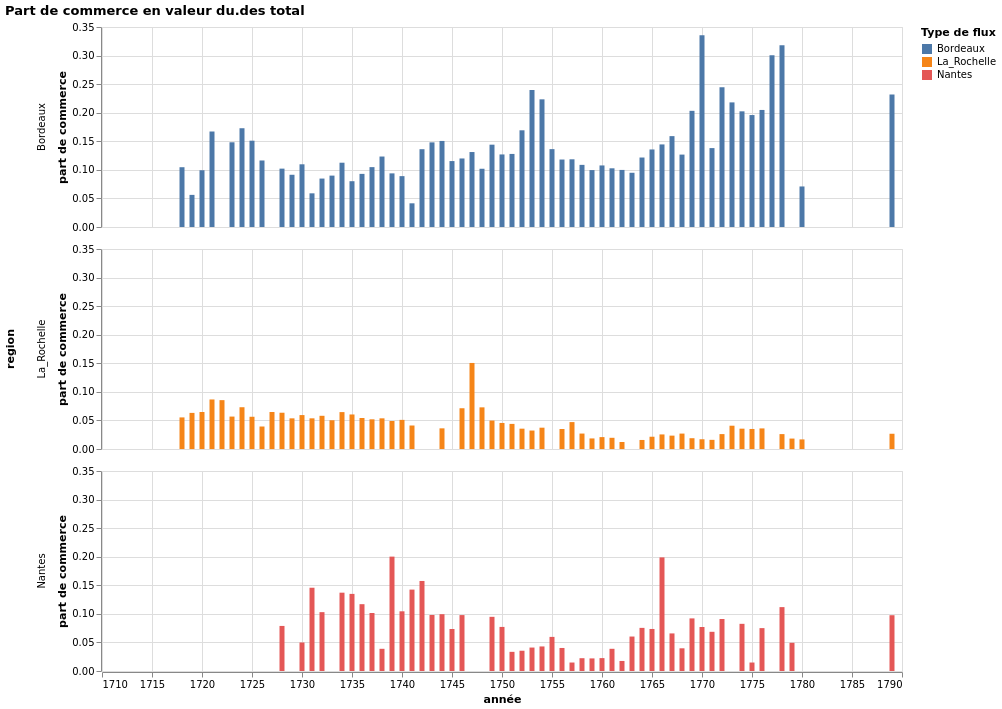

In [23]:
smallmultiple_barChart_spec('total')

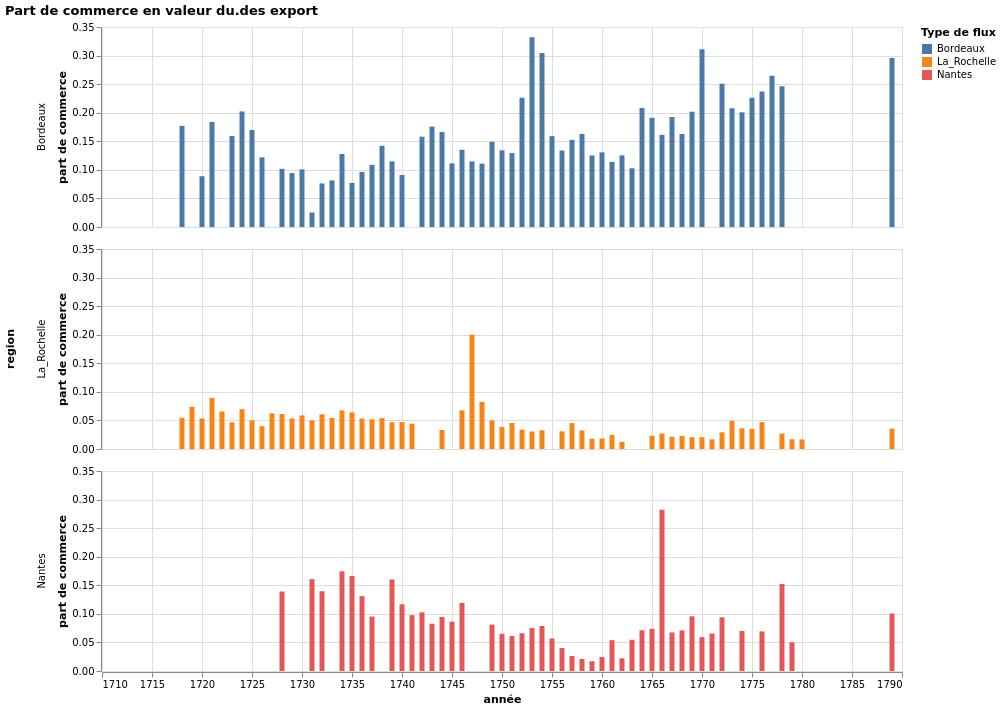

In [24]:
smallmultiple_barChart_spec('export')

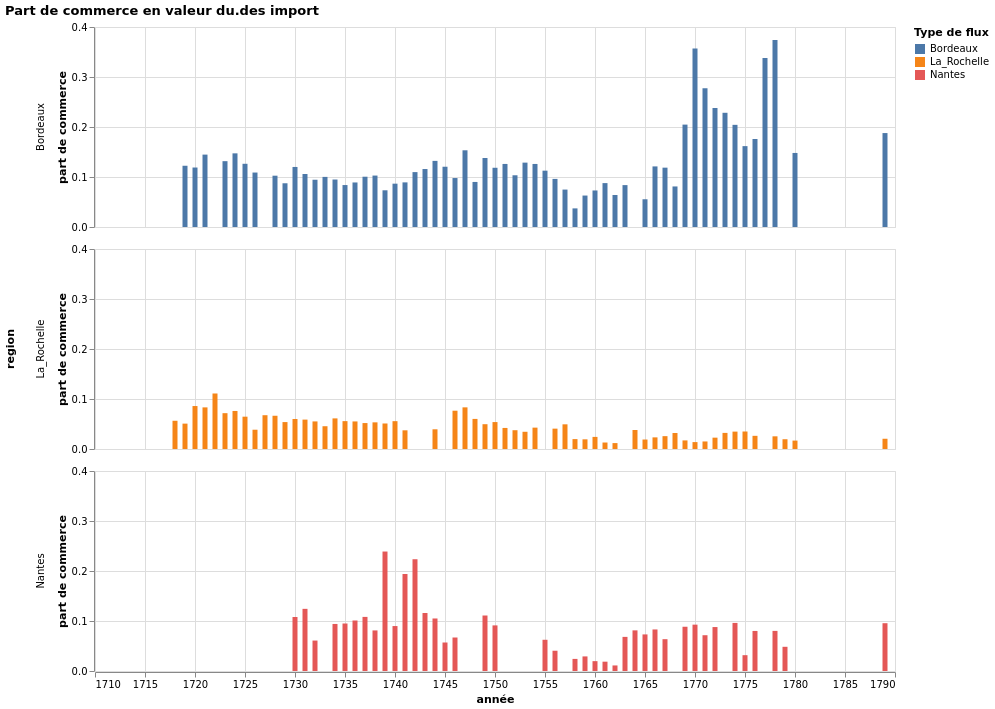

In [25]:
smallmultiple_barChart_spec('import')